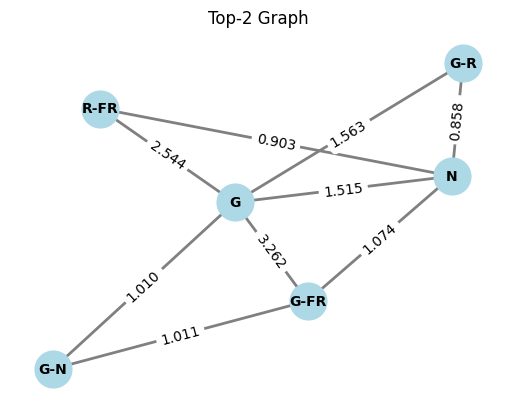

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_excel('distance_clusters1.xlsx', header=0, index_col=0)

node_labels = df.columns.tolist()
weights_matrix = df.to_numpy()
k = 2
G = nx.Graph()
for i, node_i in enumerate(node_labels):
    for j, node_j in enumerate(node_labels[i+1:], start=i+1):  # Avoid duplicating edges and self-loops
        weight = round(weights_matrix[i][j], 3)  
        G.add_edge(node_i, node_j, weight=weight)


G_top_k = nx.Graph()
G_top_k.add_nodes_from(node_labels)  

for node in G.nodes:
    # Sort edges of the current node based on weight, descending (for heaviest)
    edges = sorted(G.edges(node, data=True), key=lambda x: x[2]['weight'], reverse=True)[:k]
    for edge in edges:
        G_top_k.add_edge(edge[0], edge[1], weight=edge[2]['weight'])


pos = nx.spring_layout(G_top_k)  
nx.draw_networkx_nodes(G_top_k, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G_top_k, pos, width=2.0, edge_color='gray')
nx.draw_networkx_labels(G_top_k, pos, font_size=10, font_weight='bold')
edge_labels = {edge: f"{weight:.3f}" for edge, weight in nx.get_edge_attributes(G_top_k, 'weight').items()}
nx.draw_networkx_edge_labels(G_top_k, pos, edge_labels=edge_labels)
plt.title("Top-2 Graph")
plt.axis('off')
plt.show()


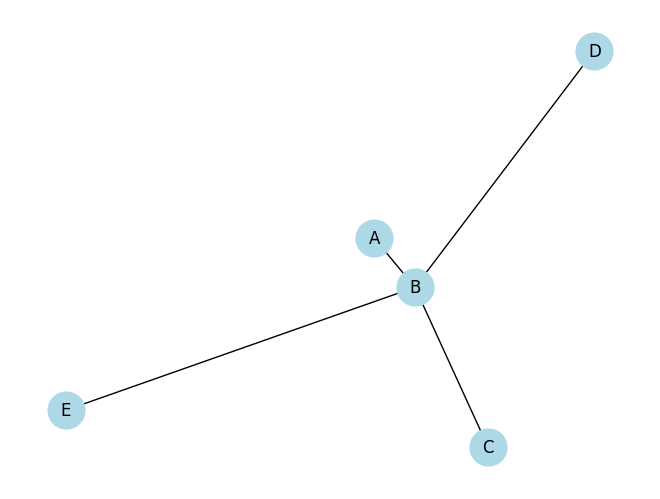

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges with weights
# Note: Here we are adding the actual weights
G.add_edge('A', 'B', weight=0.1)  # Smaller weight
G.add_edge('B', 'C', weight=1) 
G.add_edge('B', 'D', weight= 4 )
G.add_edge('B', 'E', weight=10) # Larger weight

# Invert the weights for the layout calculation
# The spring layout algorithm will interpret smaller distances for larger weights
for u, v, d in G.edges(data=True):
    d['weight'] = 1.0 / d['weight']  # Invert the weight

# Generate positions for the nodes based on the spring layout
# Here, the 'weight' parameter is used to influence the distances inversely proportional to the given weights
pos = nx.spring_layout(G, weight='weight')

# Draw the graph
nx.draw(G, pos, with_labels=True, edge_color='black', width=1,
        node_size=700, node_color='lightblue',
        edge_cmap=plt.cm.Blues)

# Show the graph
plt.show()
